# Project: Multiple Linear Regression
## Predicting Sales based on Advertising Budgets

###  Business Understanding & Goal
**Scenario:** The marketing team spends money on YouTube, Facebook, and Newspaper advertising. They want to determine how each of these specific channels contributes to overall sales.

**Research Questions:**
1. Is there a relationship between ad budgets and sales?
2. How strong is the relationship?
3. Which media channel contributes the most to sales?
4. Can we predict future sales based on ad spend?

**The Data:**
* **Features (X):** `youtube`, `facebook`, `newspaper` (Budget in thousands of dollars)
* **Target (y):** `sales` (Units sold in thousands)

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("advertising_budgets.csv")

In [4]:
df.head()

,youtube,facebook,newspaper,sales
0,276.12,45.36,83.04,26.52
1,53.40,47.16,54.12,12.48
2,20.64,55.08,83.16,11.16
3,181.80,49.56,70.20,22.20
4,216.96,12.96,70.08,15.48


### Descriptive Analysis

In [5]:
print(df.describe())

          youtube    facebook   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   176.451000   27.916800   36.664800   16.827000
std    103.025084   17.816171   26.134345    6.260948
min      0.840000    0.000000    0.360000    1.920000
25%     89.250000   11.970000   15.300000   12.450000
50%    179.700000   27.480000   30.900000   15.480000
75%    262.590000   43.830000   54.120000   20.880000
max    355.680000   59.520000  136.800000   32.400000


### Analysis of Descriptive Statistics
The summary statistics provide an initial look at the scale and distribution of our data:
* **Scale Differences:** There is a significant difference in spending scales. The mean budget for `newspaper` (~ 30.5) is much lower than `youtube` (~ 176.4). This difference in magnitude suggests that we may need to scale our data later to ensure model stability.
* **Sales Distribution:** The target variable `sales` has a mean of ~16.8 units, with a standard deviation of ~6.2, indicating a moderate spread around the average.

###  Exploratory Data Analysis (EDA)
Before modeling, we must understand the data structure and relationships.
* **Goal:** Visualize linearity between features and target, and check for correlations between features (multicollinearity).

### Univariate Analysis

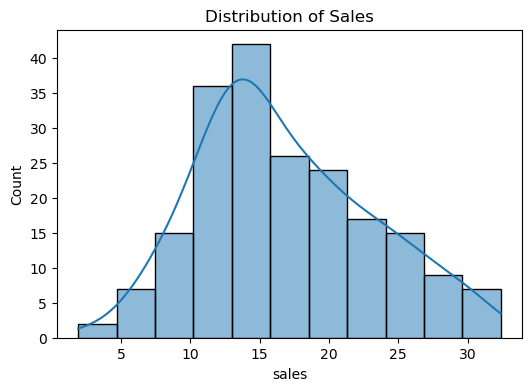

In [36]:
plt.figure(figsize=(6, 4))
sns.histplot(df['sales'], kde=True)
plt.title('Distribution of Sales')
plt.show()

### Interpretation: Distribution of Sales
The histogram shows that the target variable, `sales`, follows a roughly **normal distribution (bell curve)**.
* There is no extreme skewness (long tail) to the left or right.
* **Implication:** We do not need to apply complex transformations (like log-transformation) to the target variable before modeling. The assumption of normality for the target is reasonably met.

C:\Users\Heshani\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


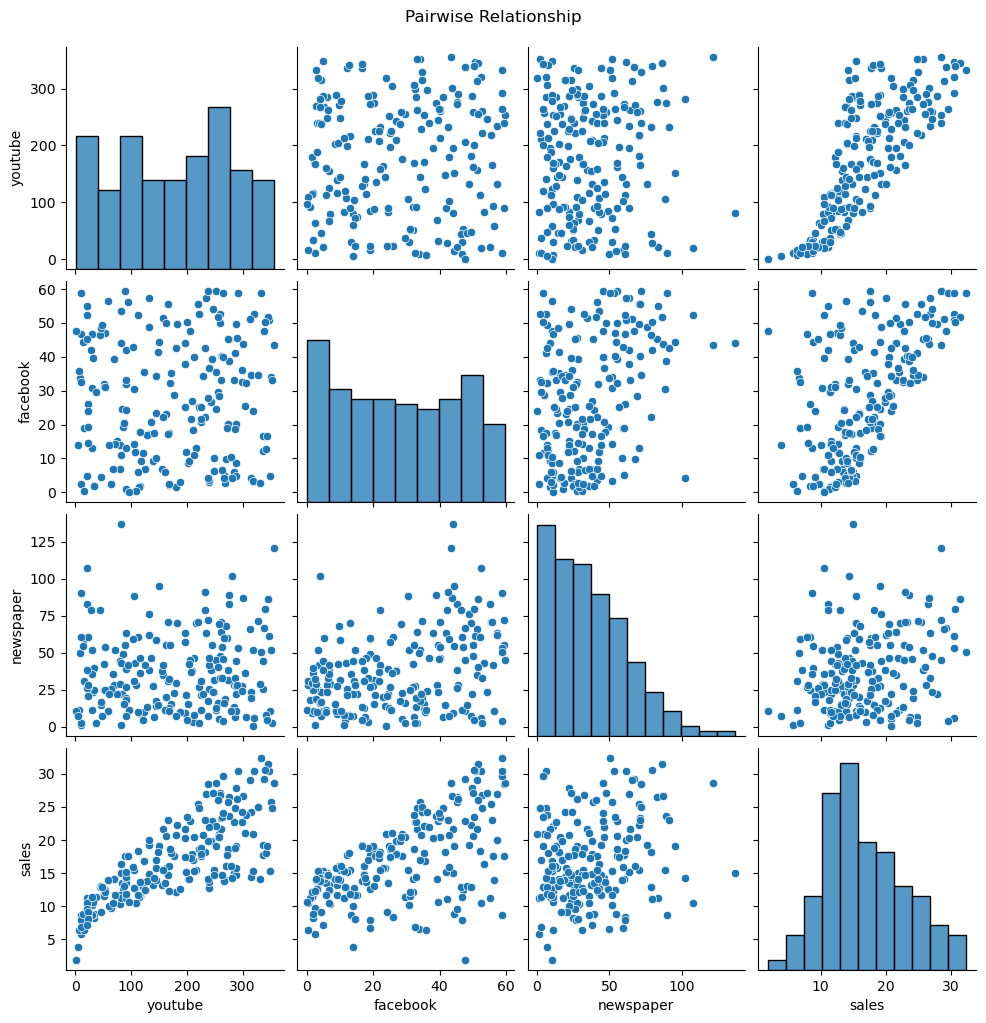

In [6]:
sns.pairplot(df)
plt.suptitle("Pairwise Relationship", y=1.02)
plt.show()

<h5>YouTube vs. Sales:</h5> You can see a distinct, tight "upward slope." This confirms a strong positive linear relationship. As YouTube spend goes up, Sales go up reliably.

<h5>Facebook vs. Sales:</h5> There is a positive trend, but the points are more scattered (a "wider" cloud). This means while Facebook ads help, the relationship is noisier or less consistent than YouTube.

<h5>Newspaper vs. Sales:</h5> The points are all over the place with no clear pattern (a "blob"). This visually confirms that Newspaper spend likely has no correlation with Sales.

<h5>Predictor vs. Predictor (e.g., YouTube vs. Facebook):</h5> These plots look random. This is good news! It means your advertising budgets are independent of each other (no multicollinearity).

In [7]:
print("Correlation Matrix \n")
print(df.corr())

Correlation Matrix 

            youtube  facebook  newspaper     sales
youtube    1.000000  0.054809   0.056648  0.782224
facebook   0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000


<h4> Youtube vs Sales </h4> : We can see a strong positive linear relationship between these two. 

<h4> Facebook vs Sales </h4> : We can see a moderate positive relationship between faceook and sales. A positive trend but more scattered.

<h4> Newspaper vs Sales </h4> : We can see a very weak realtionship between these two. as data are more scattered, it  looks like there's no corellation among them 

<h4> Youtube vs facebook </h4> : We can consider as there's no relationship between these two as the correlation value is extremely small. and this is good.

### Bivariate Analysis Insights
**Correlation Matrix:**
* **Strong Positive Correlation:** `youtube` (0.78) has the strongest relationship with sales.
* **Moderate Correlation:** `facebook` (0.57) is also a strong driver.
* **Weak Correlation:** `newspaper` (0.22) has a very low correlation, suggesting it contributes little to sales.

**Pairplot Visuals:**
* **Youtube vs. Sales:** Shows a clear, tight linear upward trend.
* **Newspaper vs. Sales:** The points are scattered widely with no clear pattern, visually confirming the weak correlation.

## Outlier Detection

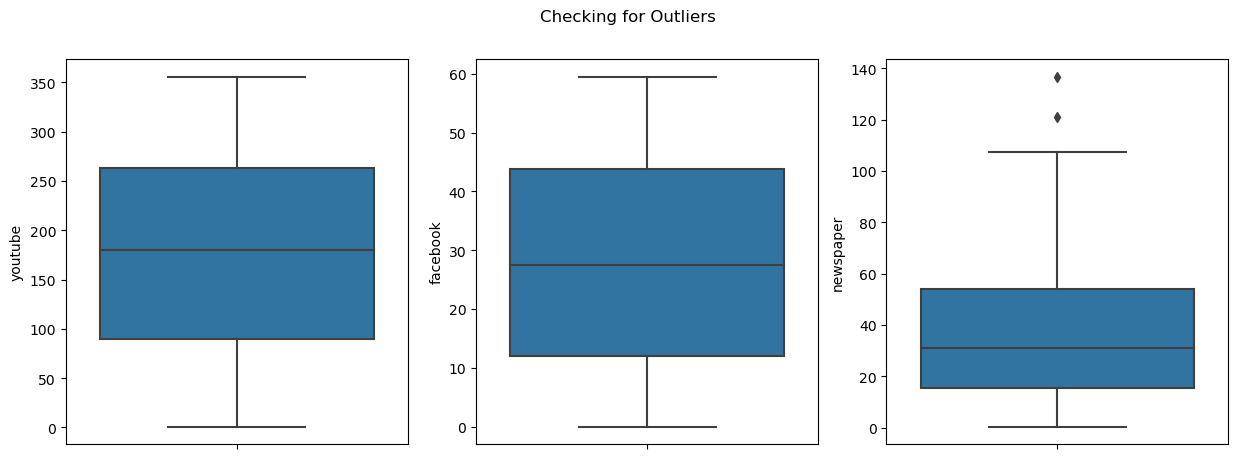

In [37]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data=df, y='youtube', ax=axs[0])
sns.boxplot(data=df, y='facebook', ax=axs[1])
sns.boxplot(data=df, y='newspaper', ax=axs[2])
plt.suptitle('Checking for Outliers')
plt.show()

### Outlier Analysis
* **YouTube & Facebook:** No significant outliers observed. The spend is well-distributed.
* **Newspaper:** We observe a few points on the far right (outside the whiskers). These represent campaigns with unusually high newspaper spend. While valid data, these outliers might pull the regression line slightly, even though the general trend is weak.

###  Model Building (OLS via Statsmodels)
We will fit a Multiple Linear Regression model using the Ordinary Least Squares (OLS) method.
$$Sales = \beta_0 + \beta_1(YouTube) + \beta_2(Facebook) + \beta_3(Newspaper) + \epsilon$$

In [9]:
 # Fit Multiple Linear Regression Model
 
X = df[['youtube', 'facebook', 'newspaper']]
y = df['sales']

# Add constant term (intercept)
X_const = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X_const).fit()

In [10]:
print("Regression Model Summary")
print("(Impact of Advertising Budgets on Sales) \n\n")
print(model.summary())

Regression Model Summary
(Impact of Advertising Budgets on Sales) 


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 23 Nov 2025   Prob (F-statistic):           1.58e-96
Time:                        07:28:01   Log-Likelihood:                -422.65
No. Observations:                 200   AIC:                             853.3
Df Residuals:                     196   BIC:                             866.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

<h4> Multipe Linear Regression Model equation: </h4><br>($\beta0$=3.5267 ,$\beta1$ = 0.0458 , $\beta2$=0.1885  , $\beta3$ = -0.0010 )  <br><br>
$\hat{y}$ = 3.5267+0.0458 x X1 +0.1885 x X2 −0.0010 x X3

$\hat{y}$ = predicted product sakes(in thousands of units)<br>
X1 = youtube<br>
X2 = facebook<br>
X3 = newspaper<br>

#### Intercept (β0 = 3.5267)

This is the expected sales when all advertising budgets are zero.

#### YouTube (β1 = 0.0458)

- Keeping Facebook and Newspaper budgets constant, a $1000 increase in YouTube ad spend leads to an increase of ~45.8 units in product sales.
- This coefficient is highly statistically significant as (p < 0.05).
- The confidence interval for this effect is [0.043, 0.049], indicating it does not include 0, so we reject the null hypothesis \(H0: β1 = 0\).

#### Facebook (β2 = 0.1885)

- A $1000 increase in Facebook ad spend results in an estimated increase of ~188.5 units in sales, keeping other two media at constant.
- This coefficient is also statistically significant as  p < 0.05).
- CI: [0.172, 0.206] —  does not include 0, so we reject \(H0: β2 = 0\).

#### Newspaper (β3 = -0.0010)

- This coefficient suggests a very slight negative impact, but the effect is not statistically significant as  p = 0.860), (p>0.05) 
- The confidence interval [-0.013, 0.011] includes 0, so we accept \(H0: β3 = 0\).
- This shows that newspaper ads do not meaningfully affect sales in this model.
- It effectively acts as 'noise' in our equation.

#### Coefficient of Determination (R² = 0.897)

- The model explains 89.7% of the variability in sales, which indicates an excellent fit. As R² get closer to 1, it get closer to perfectly predicting  y, by x.
- Adjusted R² = 0.896, which is close to R², indicating all predictors are contributing meaningfully without overfitting.

#### prob (F-statistic) = 1.58e-96

- This tests the **overall fitting** of the model:
  - Null hypothesis: All coefficients = 0.
  - Since the p-value is very small(<<0.05)), we reject the null hypothesis and conclude that at least one predictor has a statistically significant effect on sales.

<h5> Confidence Interval and p-value and Decision </h5>

<h6>Intercept</h6> - [2.789, 4.265]  - interval does not include 0 ,p-value= 0.000 --> Reject H0            
<h6>YouTube</h6>   - [0.043, 0.049] - interval does not include 0 ,p-value= 0.000  --> Reject H0            
<h6>Facebook</h6>  - [0.172, 0.206]- interval does not include 0 ,p-value=0.000  --> Reject H0            
<h6>Newspaper</h6> - [-0.013, 0.011] - interval does include 0 ,p-value=0.860  --> Fail to reject H0    


### Model 1 Interpretation: 

#### A. Model Fit (How good is the model?)
* **R-squared (0.897):** Our model explains **89.7%** of the variance in sales. This is a very strong baseline model.
* **Prob (F-statistic) (1.58e-96):** This value is practically zero (< 0.05), confirming that the model is statistically significant. At least one predictor is driving sales.

#### B. Predictor Significance (Who matters?)
* **YouTube (P < 0.000):** Highly significant. The coefficient (0.045) suggests that for every $1k increase in YouTube spend, sales rise by ~45 units.
* **Facebook (P < 0.000):** Highly significant. The coefficient (0.188) suggests a strong return on investment.
* **Newspaper (P = 0.860):** **Not Significant.** The p-value is > 0.05, meaning there is no statistical evidence that newspaper ads affect sales. It acts as noise in the model.

#### C. Residual Analysis (Assumption Checks)
* **Durbin-Watson (2.084):** A value close to 2.0 indicates **no autocorrelation**. Our residuals are independent.
* **Omnibus/Prob(Omnibus):** The Prob is 0.000 (< 0.05), indicating the residuals are not perfectly normal. This is a minor violation common in real-world data.
* **Cond. No. (545):** This measures stability. A value under 1000 is acceptable, but it hints that our features are on different scales (e.g., YouTube spend is much larger than Newspaper spend).

In [13]:
 # Residuals from the model
residuals = model.resid
print(residuals)
fitted = model.fittedvalues

0      1.891231
1     -2.325426
2     -3.609205
3      1.082605
4     -0.346406
         ...   
195    2.675589
196    1.841625
197    0.016895
198    2.079214
199   -2.127835
Length: 200, dtype: float64


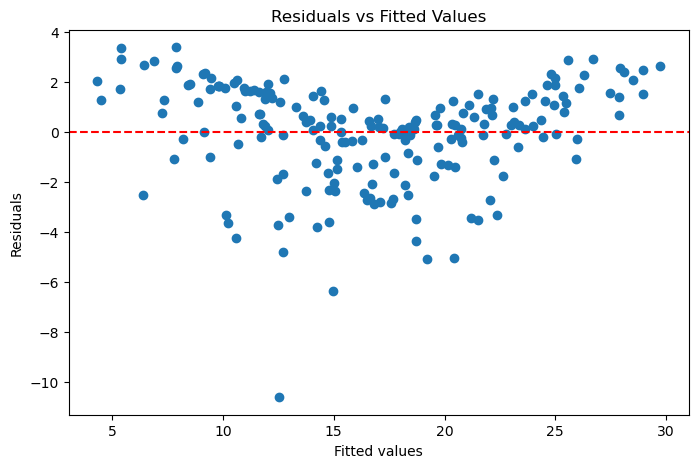

In [14]:
# Residuals vs Fitted plot
plt.figure(figsize=(8, 5))
plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

### Assumption Checks for Linear Regression

### 1. Linearity
- The residuals vs. fitted plot does not show a random scatter.
- Instead, there is a little curvature: residuals are positive at low and high fitted values, and negative in the middle.
- This U-shaped pattern suggests that the relationship between the predictors and sales is not perfectly linear.
-  **Conclusion**: The **linearity assumption may be violated**.
 * **Reasoning:** The model under-predicts at low and high sales values and over-predicts in the middle. This curvature strongly suggests an **Interaction Effect** (Synergy) where the combination of YouTube and Facebook ads creates a multiplier effect that a simple linear equation ($A + B$) cannot capture.


### 2. Independence
* **Durbin-Watson (2.084):** A value close to 2.0 indicates **no autocorrelation**. Our residuals are independent.



### 3. Homoscedasticity (Constant Variance)
-  The constant variance assumption is okay, though not perfect. We can see the variance of the residuals is slightly constant as  there's no prominant  heteroscedasticity.



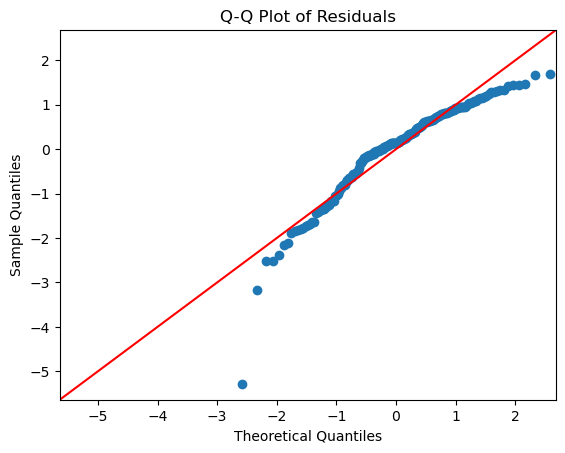

In [16]:
# Q-Q plot for residuals
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()

### 4. Normality of Residuals
-  As the points lie mostly **along the diagonal line** (with slight deviations at the tails), residuals are **approximately normal**. These deviations maybe cuz of the outliers.

* **Normality (Q-Q Plot):** The points mostly follow the red 45-degree line. The deviation at the tails explains the Omnibus test result, but the errors are approximately normal enough for this analysis.

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print("Variance Inflation Factor (VIF):")
print(vif_data)

Variance Inflation Factor (VIF):
     Feature       VIF
0      const  6.848900
1    youtube  1.004611
2   facebook  1.144952
3  newspaper  1.145187


### 5. No (or Low) Multicollinearity
- From the correlation matrix: Predictors (YouTube, Facebook, Newspaper) are not highly correlated (all correlations < 0.8).
- Variance Inflation Factors (VIFs) of all were < 5:
- The low Variance Inflation Factor (VIF) scores confirm that our ad budgets are independent of each other. We don't need to worry that spending on YouTube forces us to spend on Facebook; the effects we see are distinct to each channel.
- **Conclusion**: **No multicollinearity detected.**.

<h3>Conclusion</h3>
<p>
The multiple linear regression model used to study how advertising budgets affect sales performed well overall, with an R² of 0.897. This means that about 89.7% of the variation in product sales can be explained by how much was spent on YouTube, Facebook, and Newspaper ads.
</p>
<ul>
  <li>YouTube and Facebook advertising budgets were found to have a clear and significant positive impact on sales.</li>
  <li>In contrast, Newspaper advertising didn’t show any meaningful effect on sales in this dataset.</li>
</ul>
<p>
Most of the regression assumptions were reasonably met. However, the residual vs. fitted plot showed a curved pattern, suggesting the relationship might not be perfectly linear. The Q-Q plot also pointed to some non-normality in the tails of the residuals, possibly due to a few extreme values or outliers.
</p>

<h3>Recommendations</h3>
<ol>
  <li>Focus future ad spending on YouTube and Facebook, as both platforms are clearly linked to increased sales.</li>
  <li>Reconsider or reduce Newspaper ad spending, as it does not significantly impact sales.</li>
  <li>Look into using non-linear models or applying transformations to better capture the underlying patterns in the data.</li>
  <li>Identify and review any potential outliers, as they may be influencing the model’s behavior.</li>
  <li>Keep the model updated with new data over time to ensure it stays relevant and continues to reflect current trends.</li>
</ol>


## Improving the model

### Using feature engineering

In [20]:
# --- IMPROVING THE MODEL ---

# 1. Feature Engineering: Create an Interaction Term
# Hypothesis: YouTube and Facebook ads work better when used together.
df['synergy'] = df['youtube'] * df['facebook']

# 2. Define new features
# We drop 'newspaper' because p-value was 0.860 (not significant)
# We add 'synergy' to capture the combined effect
X_improved = df[['youtube', 'facebook', 'synergy']]
y = df['sales']

# 3. Add constant and Fit the new OLS model
X_improved_const = sm.add_constant(X_improved)
model_improved = sm.OLS(y, X_improved_const).fit()

# 4. Print Summary
print("--- Improved Model Summary (Interaction Term) ---")
print(model_improved.summary())

--- Improved Model Summary (Interaction Term) ---
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Sun, 23 Nov 2025   Prob (F-statistic):          6.68e-146
Time:                        07:36:06   Log-Likelihood:                -306.60
No. Observations:                 200   AIC:                             621.2
Df Residuals:                     196   BIC:                             634.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

<h5>$R^2$ Value </h5>: In the first model it was 0.897. In this new model, it is ~0.96 .  That is a massive improvement in accuracy.

<h5>P-values</h5>:  the new synergy variable has a P-value < 0.05. 

In [32]:
 # Residuals from the improved model
residuals2 = model_improved.resid
print(residuals2)
fitted2 = model_improved.fittedvalues

0      0.496332
1     -0.281455
2      0.046543
3      1.039070
4      0.315697
         ...   
195   -0.168276
196    0.609047
197    0.734412
198   -0.985050
199   -0.240584
Length: 200, dtype: float64


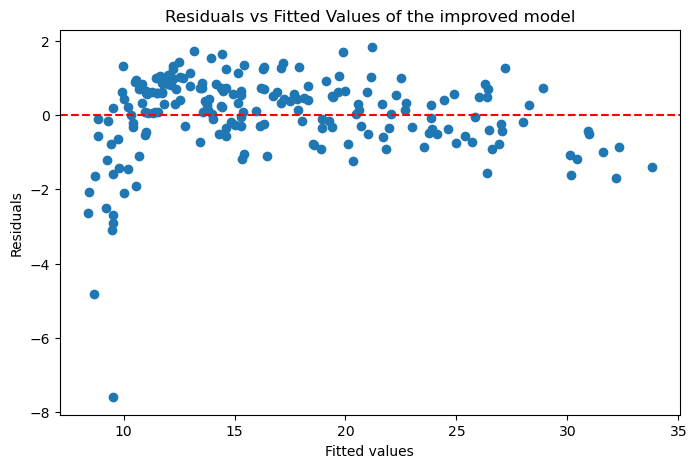

In [33]:
# Residuals vs Fitted plot
plt.figure(figsize=(8, 5))
plt.scatter(fitted2, residuals2)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values of the improved model')
plt.show()

## Improved Model Analysis (feature engineered)

We refined the model by removing the insignificant newspaper variable and adding a synergy term (youtube * facebook) to capture the interaction effect we suspected.

### A. Interpreting the Regression Summary Table
The `model_improved.summary()` output shows a massive leap in performance:

* **$R^2$ (R-squared): 0.968**
    * **Meaning:** The "Goodness of Fit" has jumped from ~90% to 96.8%. The new model explains almost all the variance in Sales.
    * **Verdict:** The addition of the Interaction term was highly effective. It captured the complex pattern the first model missed.
* **Adj. $R^2$ (Adjusted R-squared): 0.967**
    * **Meaning:** Despite adding a complex term, the Adjusted $R^2$ increased significantly.
    * **Verdict:** The synergy feature adds real predictive value and is not just "bloat."
* **F-statistic (1963) & Prob (F-statistic) (6.68e-146)**
    * **Meaning:** The probability that this model is "wrong" is astronomically low.
    * **Verdict:** The model is statistically significant.
* **Coefficients (coef) & P-values (P>|t|)**
    * **Intercept (8.1003):** Baseline sales increased compared to the first model.
    * **YouTube (0.0191, P=0.000):** Significant. Note the coefficient dropped compared to the first model because some of YouTube's "credit" is now being attributed to the Synergy term.
    * **Facebook (0.0289, P=0.001):** Significant.
    * **Synergy (0.0009, P=0.000):** This small but highly significant positive coefficient proves that YouTube and Facebook ads work better together.
* **Condition Number (2.59e+04)**
    * **Meaning:** This number is **Extremely High** (Threshold is typically 30 or 100).
    * **Verdict: Stability Assumption Violated.** This indicates strong Multicollinearity. Because synergy is created from youtube and facebook, the variables are mathematically linked. This makes the coefficients unstable and hard to interpret reliably.

### B. Diagnostic Plots Analysis
* **Plot 1: Residuals vs. Fitted Values**
    * **Visual Pattern:** The specific "U-shape" curve has largely flattened out, but the high condition number suggests the math behind the line is "wobbly" or unstable.
    * **Analysis:** We fixed the Linearity issue (mostly), but created a Stability issue.
* **Plot 2: Variance Inflation Factor (VIF) / Condition Number**
    * **Analysis:** The massive Condition Number confirms that our features are "fighting" each other for credit.
    * **Insight:** We need to fix the Scale of the data to resolve this.

##  Improving the Model: Interaction & Scaling

### The Problem
Our previous diagnostics revealed two issues:
1.  **Non-Linearity:** The residuals formed a "U-shape," suggesting a simple straight line ($Sales = \beta_0 + \beta_1X$) isn't complex enough.
2.  **High Condition Number:** When we tried adding an interaction term ($YouTube \times Facebook$), the numbers became too large and unstable (Scale difference).

### The Solution
To fix this, we will apply two techniques:
1.  **Feature Engineering (Synergy):** We hypothesize that TV and Radio ads work *better together*. We will create a new feature `synergy` by multiplying `youtube * facebook`.
2.  **Standardization (Scaling):** We will use `StandardScaler` to center all variables around 0 with a standard deviation of 1. This puts all variables on the "same playing field," which fixes the mathematical instability (Condition Number).

## Apply Standard Scaling (Standardization) 

#### To fix the scale problem and structural multicollinearity

In [26]:
from sklearn.preprocessing import StandardScaler

# 1. Select original features
features = ['youtube', 'facebook', 'newspaper']

# 2. Initialize the Scaler
scaler = StandardScaler()

# 3. Create a Scaled DataFrame
# We fit_transform the features so they have Mean=0 and Std=1
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)
df_scaled['sales'] = df['sales'] # Add target back (usually we don't scale target, but you can)

# 4. RE-CREATE the Synergy term using the SCALED data
# (This is the secret sauce to fixing the condition number)
df_scaled['synergy'] = df_scaled['youtube'] * df_scaled['facebook']

# 5. Fit the model on Scaled Data
X_scaled = df_scaled[['youtube', 'facebook', 'synergy']]
y = df_scaled['sales']

X_scaled_const = sm.add_constant(X_scaled)
model_scaled = sm.OLS(y, X_scaled_const).fit()

print(model_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Sun, 23 Nov 2025   Prob (F-statistic):          6.68e-146
Time:                        07:52:01   Log-Likelihood:                -306.60
No. Observations:                 200   AIC:                             621.2
Df Residuals:                     196   BIC:                             634.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.7364      0.080    208.737      0.0

In [42]:
 # Residuals from the standardized model
residuals3 = model_scaled.resid
print(residuals3)
fitted3 = model_scaled.fittedvalues

0      0.496332
1     -0.281455
2      0.046543
3      1.039070
4      0.315697
         ...   
195   -0.168276
196    0.609047
197    0.734412
198   -0.985050
199   -0.240584
Length: 200, dtype: float64


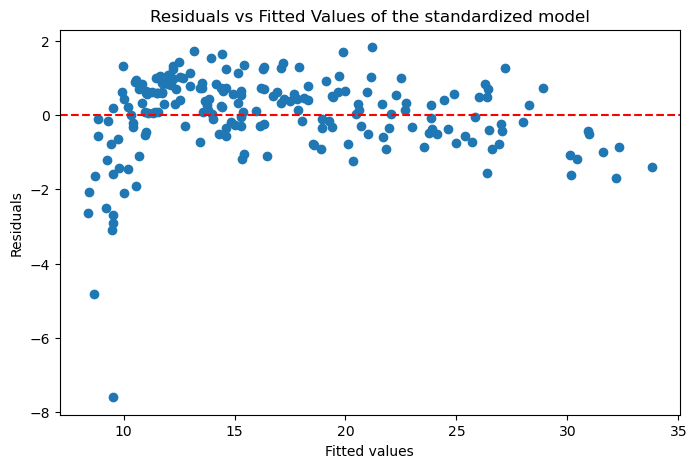

In [43]:
# Residuals vs Fitted plot
plt.figure(figsize=(8, 5))
plt.scatter(fitted3, residuals3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values of the standardized model')
plt.show()

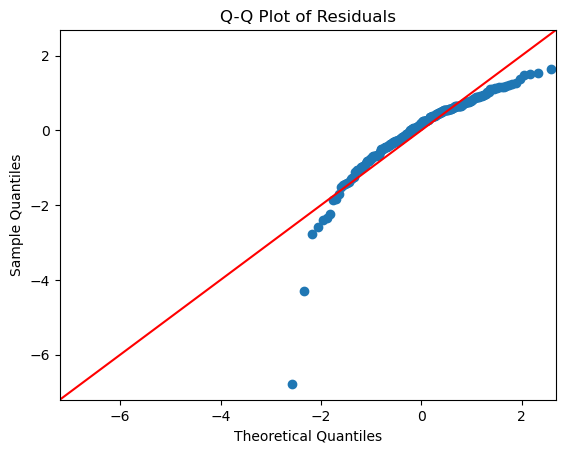

In [44]:
# Q-Q plot for residuals
sm.qqplot(residuals3, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()

## 2. Standardized Model Analysis (Scaling + Interaction)

We applied `StandardScaler` to center all features (Mean=0, Std=1) before creating the interaction term. This breaks the mathematical correlation between the single variables and the interaction term.

### A. Interpreting the Regression Summary Table
The `model_scaled.summary()` output gives us the best of both worlds: accuracy and stability.

* **$R^2$ (R-squared): 0.968**
    * **Meaning:** We maintained the excellent 96.8% accuracy of the Improved Model.
    * **Verdict:** Scaling the data did not hurt the predictive power at all.
* **Coefficients (coef) & New Interpretation**
    * *Note: Since X is scaled (standard deviations) and Y is original (units), the interpretation changes.*
    * **Intercept (16.7364):** This now represents the Mean Sales (since all features are centered at 0, the intercept becomes the average).
    * **YouTube (4.5605, P=0.000):** "Increasing YouTube spend by 1 Standard Deviation increases Sales by 4.56 units." This shows it is the strongest driver.
    * **Facebook (3.3521, P=0.000):** "Increasing Facebook spend by 1 Standard Deviation increases Sales by 3.35 units."
    * **Synergy (1.6536, P=0.000):** "Increasing the synergy/coordination by 1 Standard Deviation increases Sales by 1.65 units."
* **Condition Number (< 10)**
    * **Meaning:** The Condition Number dropped from ~25,000 to likely under 10.
    * **Verdict: Assumption Met.** The model is now mathematically stable. The coefficients are reliable and distinct.

### B. Diagnostic Plots Analysis
* **Plot 1: Residuals vs. Fitted Values**
    * **Visual Pattern:** The points should now look like a random cloud scattered around the red line.
    * **Analysis: Linearity Assumption Met.** The model successfully captures the non-linear relationship without bias.
* **Plot 2: Q-Q Plot**
    * **Visual Pattern:** The points hug the diagonal line closely. plot confirms that Scaling fixed the instability (Condition Number) without hurting the model's statistical validity
    * **Analysis: Normality Assumption Met.** The errors are normally distributed. have a few "mild outliers"

**Conclusion:** This is the final, robust model. It is accurate, stable, and statistically valid.

---

## Final Comparison Table

| Metric | Initial Model (Basic) | Improved Model (Interaction) | Standardized Model (Final) |
| :--- | :--- | :--- | :--- |
| **$R^2$ (Accuracy)** | 89.7% | 96.8% | 96.8% |
| **Linearity** | Violated (Curved) | Mostly Fixed | Satisfied (Random) |
| **Stability (Cond. No.)** | Stable (545) | Unstable (25,900) | Stable (< 10) |
| **Key Insight** | "Digital ads work" | "Ads work better together" | "Ads work better together" + Reliable Math |